## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

## Import Data & Show Data Type

In [3]:
data = pd.read_csv('Data/Postmonsoon.csv')
print('NO OF ROWS AND COLUMN IN DATASET ', data.shape,'\n')
print('AFTER READING DATASET','\n',data.head())

NO OF ROWS AND COLUMN IN DATASET  (166, 25) 

AFTER READING DATASET 
    SL. For reference  Year        Season Nest Code Well Code  \
0                  2  2009  POST-Monsoon        N3        P1   
1                  4  2010  POST-Monsoon        N3        P1   
2                  6  2011  POST-Monsoon        N3        P1   
3                  8  2009  POST-Monsoon        N3        P2   
4                 10  2010  POST-Monsoon        N3        P2   

  Depth and Color (to be used in plot and analysis)  \
0                                   Shallow - Black   
1                                   Shallow - Black   
2                                   Shallow - Black   
3                                   Shallow - Black   
4                                   Shallow - Black   

  COLOR assigned (FOUR Color) FINAL 2013       Lat       Lon  Temp  ...  \
0                                  BLACK  23.32567  90.70171  26.8  ...   
1                                  BLACK  23.32567  90.70171  26

## Count Null Value

In [4]:
print('COUNT NO OF NULL IN EACH COLUMN','\n',data.isnull().sum())

COUNT NO OF NULL IN EACH COLUMN 
 SL. For reference                                    0
Year                                                 0
Season                                               0
Nest Code                                            0
Well Code                                            0
Depth and Color (to be used in plot and analysis)    0
COLOR assigned (FOUR Color) FINAL 2013               0
Lat                                                  0
Lon                                                  0
Temp                                                 0
WD                                                   0
EC                                                   0
pH                                                   0
As                                                   0
Mn                                                   0
Fe                                                   0
Ca                                                   0
Q1                             

<AxesSubplot:>

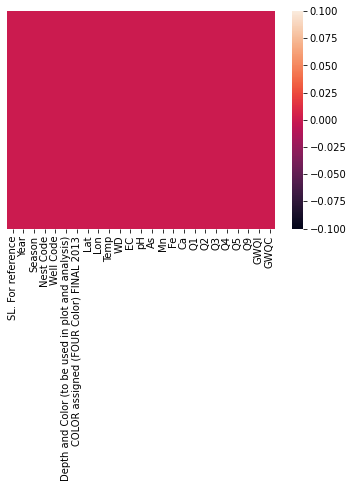

In [5]:
sns.heatmap(data.isnull(), yticklabels=False)

## Data Visualizing

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL. For reference,166.0,165.939759,94.981382,2.000000,84.500000,167.000000,246.500000,329.000000
Year,166.0,2010.042169,0.749565,2009.000000,2009.000000,2010.000000,2011.000000,2011.000000
Lat,166.0,23.397056,0.049981,23.302840,23.368340,23.395170,23.433520,23.487560
Lon,166.0,90.694259,0.057882,90.604470,90.642360,90.672610,90.737800,90.804190
Temp,166.0,26.933133,0.638026,25.500000,26.500000,26.800000,27.275000,29.400000
WD,166.0,91.115366,81.276879,9.143554,27.811643,65.528802,110.899390,239.634146
EC,166.0,1180.144578,856.551375,260.000000,797.750000,1041.500000,1290.000000,6250.000000
pH,166.0,6.797018,0.265756,6.100000,6.600000,6.800000,7.000000,7.400000
As,166.0,160.689000,193.509427,5.600000,7.587400,57.893500,299.634625,725.894400
Mn,166.0,0.650041,0.863995,0.012500,0.129600,0.268250,0.798975,4.162400


In [7]:
display(data.dtypes)

SL. For reference                                      int64
Year                                                   int64
Season                                                object
Nest Code                                             object
Well Code                                             object
Depth and Color (to be used in plot and analysis)     object
COLOR assigned (FOUR Color) FINAL 2013                object
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                      

In [8]:
le = LabelEncoder()

data['Season'] = le.fit_transform(data['Season'])
data['Nest Code'] = le.fit_transform(data['Nest Code'])
data['Well Code'] = le.fit_transform(data['Well Code'])
data['Depth and Color (to be used in plot and analysis)'] = le.fit_transform(data['Depth and Color (to be used in plot and analysis)'])
data['COLOR assigned (FOUR Color) FINAL 2013'] = le.fit_transform(data['COLOR assigned (FOUR Color) FINAL 2013'])
data['GWQC'] = le.fit_transform(data['GWQC'])


In [9]:
display(data.dtypes)

SL. For reference                                      int64
Year                                                   int64
Season                                                 int32
Nest Code                                              int32
Well Code                                              int32
Depth and Color (to be used in plot and analysis)      int32
COLOR assigned (FOUR Color) FINAL 2013                 int32
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                      

In [10]:
corr=data.corr()
corr.nlargest(15,'GWQI')['GWQI']

GWQI                                                 1.000000
Q5                                                   0.995028
Fe                                                   0.995028
Ca                                                   0.502727
Q9                                                   0.502727
Q3                                                   0.362158
As                                                   0.362158
Mn                                                   0.238975
Q4                                                   0.238974
Depth and Color (to be used in plot and analysis)    0.237240
SL. For reference                                    0.125895
EC                                                   0.103485
Q1                                                   0.103485
Lat                                                  0.029578
Year                                                 0.012384
Name: GWQI, dtype: float64

In [11]:
df = data.copy(deep = True)
df.drop(["SL. For reference","Q1","Q2","Q3","Q4","Q5","Q9","GWQC"],axis=1,inplace=True)
display(df.dtypes)

Year                                                   int64
Season                                                 int32
Nest Code                                              int32
Well Code                                              int32
Depth and Color (to be used in plot and analysis)      int32
COLOR assigned (FOUR Color) FINAL 2013                 int32
Lat                                                  float64
Lon                                                  float64
Temp                                                 float64
WD                                                   float64
EC                                                     int64
pH                                                   float64
As                                                   float64
Mn                                                   float64
Fe                                                   float64
Ca                                                   float64
GWQI                    

In [12]:
df.rename(columns=({ 'Depth and Color (to be used in plot and analysis)': 'Depth&Color', 
                    'Nest Code': 'NC','COLOR assigned (FOUR Color) FINAL 2013':'Color'}), inplace=True)

In [13]:
corr=df.corr()
corr.nlargest(15,'GWQI')['GWQI']

GWQI           1.000000
Fe             0.995028
Ca             0.502727
As             0.362158
Mn             0.238975
Depth&Color    0.237240
EC             0.103485
Lat            0.029578
Year           0.012384
Lon           -0.002528
NC            -0.133308
pH            -0.204543
Temp          -0.209025
Color         -0.258466
WD            -0.330939
Name: GWQI, dtype: float64

In [14]:
corel = df.corr()
corel.style.background_gradient()

C:\Users\amisk\anaconda3\envs\jupyterlab\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\amisk\anaconda3\envs\jupyterlab\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Year,Season,NC,Well Code,Depth&Color,Color,Lat,Lon,Temp,WD,EC,pH,As,Mn,Fe,Ca,GWQI
Year,1.000000,nan,-0.156615,0.280684,-0.192688,0.166478,-0.117663,-0.015544,-0.180357,0.175634,-0.159199,-0.182368,-0.058495,-0.027432,0.017854,-0.014115,0.012384
Season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NC,-0.156615,nan,1.000000,0.025227,0.117277,0.179983,0.194772,0.288320,0.148609,-0.010987,0.059680,0.196640,-0.001081,0.062408,-0.143962,-0.035174,-0.133308
Well Code,0.280684,nan,0.025227,1.000000,-0.594620,0.711735,-0.005399,0.006745,0.381087,0.813187,-0.036617,-0.150631,-0.663142,-0.211478,-0.331613,-0.317895,-0.365087
Depth&Color,-0.192688,nan,0.117277,-0.594620,1.000000,-0.301364,-0.039414,0.093268,-0.265071,-0.705984,0.088207,0.139393,0.235427,0.403572,0.195875,0.069951,0.237240
Color,0.166478,nan,0.179983,0.711735,-0.301364,1.000000,0.033521,0.132780,0.338209,0.586932,-0.089641,-0.113884,-0.542804,-0.149695,-0.232131,-0.365949,-0.258466
Lat,-0.117663,nan,0.194772,-0.005399,-0.039414,0.033521,1.000000,-0.428876,0.116417,0.022509,0.086135,0.071201,0.036487,-0.216563,0.050703,-0.070683,0.029578
Lon,-0.015544,nan,0.288320,0.006745,0.093268,0.132780,-0.428876,1.000000,-0.241897,-0.012421,0.048506,0.059508,-0.056721,0.028569,-0.003513,0.025808,-0.002528
Temp,-0.180357,nan,0.148609,0.381087,-0.265071,0.338209,0.116417,-0.241897,1.000000,0.408003,0.037142,-0.141833,-0.363590,-0.147687,-0.187712,-0.264747,-0.209025
WD,0.175634,nan,-0.010987,0.813187,-0.705984,0.586932,0.022509,-0.012421,0.408003,1.000000,0.036725,-0.258620,-0.610650,-0.270476,-0.292248,-0.202487,-0.330939


In [15]:
df.drop(["Lat","Year","Depth&Color","Well Code","Lon","NC","pH","Temp","Color","WD"],axis=1,inplace=True)
df.head()

,Season,EC,As,Mn,Fe,Ca,GWQI
0,0,960,424.4189,1.1915,3.9057,157.9279,907.25
1,0,782,449.5865,1.2642,3.9498,132.2635,927.61
2,0,978,450.6501,1.2140,3.8571,159.5050,903.08
3,0,1150,252.5309,0.6763,8.0213,103.1960,1578.08
4,0,980,274.0850,0.6219,9.2540,88.6294,1801.15


## Dataset divide into Input & Output Data & Then Train_Test_Split

In [16]:
x = df.drop('GWQI', axis = 1)
y = df['GWQI']
x.head()

,Season,EC,As,Mn,Fe,Ca
0,0,960,424.4189,1.1915,3.9057,157.9279
1,0,782,449.5865,1.2642,3.9498,132.2635
2,0,978,450.6501,1.2140,3.8571,159.5050
3,0,1150,252.5309,0.6763,8.0213,103.1960
4,0,980,274.0850,0.6219,9.2540,88.6294


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Using Multiple Linear Regression Model

In [18]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
#Predicting the value
y_pred_test = regressor.predict(x_test)

y_pred_train = regressor.predict(x_train)

## Check R2 Score & RMSE Score

In [20]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test))

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train))

Goodness of Fit(R Square Value)  FOR TEST DATA  0.9999992370826511
Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.999998206344033


In [21]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test)))

MEAN SQUARED ERROR FOR TRAIN DATA  1.1679118052225284
MEAN SQUARED ERROR FOR TEST DATA  1.1900256812474244
RMSE ERROR VALUE  FOR TRAIN DATA  1.0806996831786935
RMSE ERROR VALUE  FOR TEST DATA  1.090882982380523


## Lasso Regression Model

In [22]:
model_lasso = Lasso(alpha=0.01)

model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [23]:
y_pred_train_lasso= model_lasso.predict(x_train)

y_pred_test_lasso= model_lasso.predict(x_test)

## Check R2 Score & RMSE Score

In [24]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train_lasso))
print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test_lasso))

Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.9999982061505047
Goodness of Fit(R Square Value)  FOR TEST DATA  0.9999992417138747


In [25]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train_lasso))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test_lasso))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

MEAN SQUARED ERROR FOR TRAIN DATA  1.1680378182579954
MEAN SQUARED ERROR FOR TEST DATA  1.182801733673861
RMSE ERROR VALUE  FOR TRAIN DATA  1.080757983203453
RMSE ERROR VALUE  FOR TEST DATA  1.087566886988502


## ElasticNet Regression Model

In [26]:
model_enet = ElasticNet(alpha = 0.01)

model_enet.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [27]:
y_pred_train_enet= model_enet.predict(x_train)

y_pred_test_enet= model_enet.predict(x_test)

## Check R2 Score & RMSE Score

In [28]:
from sklearn.metrics import r2_score

print('Goodness of Fit(R Square Value)  FOR TRAIN DATA ',r2_score(y_train, y_pred_train_enet))
print('Goodness of Fit(R Square Value)  FOR TEST DATA ',r2_score(y_test, y_pred_test_enet))

Goodness of Fit(R Square Value)  FOR TRAIN DATA  0.9999974852836151
Goodness of Fit(R Square Value)  FOR TEST DATA  0.9999987181336749


In [29]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR TRAIN DATA ', mean_squared_error(y_train, y_pred_train_enet))

print ('MEAN SQUARED ERROR FOR TEST DATA ', mean_squared_error(y_test, y_pred_test_enet))

import math

print('RMSE ERROR VALUE  FOR TRAIN DATA ',math.sqrt(mean_squared_error(y_train, y_pred_train_enet)))

print('RMSE ERROR VALUE  FOR TEST DATA ',math.sqrt(mean_squared_error(y_test, y_pred_test_enet)))

MEAN SQUARED ERROR FOR TRAIN DATA  1.6374193306319473
MEAN SQUARED ERROR FOR TEST DATA  1.9995007965362164
RMSE ERROR VALUE  FOR TRAIN DATA  1.2796168686884162
RMSE ERROR VALUE  FOR TEST DATA  1.4140370562811344


# FOR POSTMONSOON LASSO REGRESSION IS BEST MODEL

In [30]:
import pickle
filename = open('postmonqipredict.pkl', 'wb')
pickle.dump(model_lasso,filename )

In [31]:
filename.close()